# Machine Learning Final Project: US Presidential Election Primaries

In [64]:
import sys
import os
import re
import pandas as pd
import numpy as np

In [65]:
county_facts = pd.read_csv('county_facts.csv')

In [66]:
county_facts.set_index(county_facts['fips'])
county_facts

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0
5,1007,Bibb County,AL,22506,22919,-1.8,22915,5.3,21.0,14.8,...,0.0,0.0,0,0,124707,5804,10757,19,622.58,36.8
6,1009,Blount County,AL,57719,57322,0.7,57322,6.1,23.6,17.0,...,0.0,23.2,341544,0,319700,5622,20941,3,644.78,88.9
7,1011,Bullock County,AL,10764,10915,-1.4,10914,6.3,21.4,14.9,...,0.0,38.8,0,0,43810,3995,3670,1,622.81,17.5
8,1013,Butler County,AL,20296,20946,-3.1,20947,6.1,23.6,18.0,...,0.0,0.0,399132,56712,229277,11326,28427,2,776.83,27.0
9,1015,Calhoun County,AL,115916,118586,-2.3,118572,5.7,22.2,16.0,...,0.5,24.7,2679991,0,1542981,13678,186533,114,605.87,195.7


The cell below prints out the definitions matching each county fact abbreviation.

In [67]:
county_facts_dictionary = open('county_facts_dictionary.csv', 'r')
lines = county_facts_dictionary.readlines()
for line in lines:
    
    print(line)

column_name,description

PST045214,"Population, 2014 estimate"

PST040210,"Population, 2010 (April 1) estimates base"

PST120214,"Population, percent change - April 1, 2010 to July 1, 2014"

POP010210,"Population, 2010"

AGE135214,"Persons under 5 years, percent, 2014"

AGE295214,"Persons under 18 years, percent, 2014"

AGE775214,"Persons 65 years and over, percent, 2014"

SEX255214,"Female persons, percent, 2014"

RHI125214,"White alone, percent, 2014"

RHI225214,"Black or African American alone, percent, 2014"

RHI325214,"American Indian and Alaska Native alone, percent, 2014"

RHI425214,"Asian alone, percent, 2014"

RHI525214,"Native Hawaiian and Other Pacific Islander alone, percent, 2014"

RHI625214,"Two or More Races, percent, 2014"

RHI725214,"Hispanic or Latino, percent, 2014"

RHI825214,"White alone, not Hispanic or Latino, percent, 2014"

POP715213,"Living in same house 1 year & over, percent, 2009-2013"

POP645213,"Foreign born persons, percent, 2009-2013"

POP815213,"Langua

Our country fact data are on different scales and could cause us to reach a poor fit for the models we will train. Since we cannot assume a priori that all the features are normally distributed we will instead scale each feature using: $x\rightarrow\frac{x-\min{x}}{\max{x}-\min{x}}$

In [68]:
cols = county_facts.columns.values
print(cols)

['fips' 'area_name' 'state_abbreviation' 'PST045214' 'PST040210'
 'PST120214' 'POP010210' 'AGE135214' 'AGE295214' 'AGE775214' 'SEX255214'
 'RHI125214' 'RHI225214' 'RHI325214' 'RHI425214' 'RHI525214' 'RHI625214'
 'RHI725214' 'RHI825214' 'POP715213' 'POP645213' 'POP815213' 'EDU635213'
 'EDU685213' 'VET605213' 'LFE305213' 'HSG010214' 'HSG445213' 'HSG096213'
 'HSG495213' 'HSD410213' 'HSD310213' 'INC910213' 'INC110213' 'PVY020213'
 'BZA010213' 'BZA110213' 'BZA115213' 'NES010213' 'SBO001207' 'SBO315207'
 'SBO115207' 'SBO215207' 'SBO515207' 'SBO415207' 'SBO015207' 'MAN450207'
 'WTN220207' 'RTN130207' 'RTN131207' 'AFN120207' 'BPS030214' 'LND110210'
 'POP060210']


We can ignore the first 3 columns, since that data would only be useful if we have data spanning more than one election cycle (and if we had set up a system to handle categorical features).

In [69]:
cols = cols[3:]
cols

array(['PST045214', 'PST040210', 'PST120214', 'POP010210', 'AGE135214',
       'AGE295214', 'AGE775214', 'SEX255214', 'RHI125214', 'RHI225214',
       'RHI325214', 'RHI425214', 'RHI525214', 'RHI625214', 'RHI725214',
       'RHI825214', 'POP715213', 'POP645213', 'POP815213', 'EDU635213',
       'EDU685213', 'VET605213', 'LFE305213', 'HSG010214', 'HSG445213',
       'HSG096213', 'HSG495213', 'HSD410213', 'HSD310213', 'INC910213',
       'INC110213', 'PVY020213', 'BZA010213', 'BZA110213', 'BZA115213',
       'NES010213', 'SBO001207', 'SBO315207', 'SBO115207', 'SBO215207',
       'SBO515207', 'SBO415207', 'SBO015207', 'MAN450207', 'WTN220207',
       'RTN130207', 'RTN131207', 'AFN120207', 'BPS030214', 'LND110210',
       'POP060210'], dtype=object)

In [70]:
cf = county_facts[cols].copy() # A partial copy of county facts for us to modify.
for c in cols:
    c_max = county_facts[c].max()
    c_min = county_facts[c].min()
    #print(c_max)
    #print(c_min)
    cf[c] = (cf[c] - c_min)/(c_max - c_min)
cf

,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,RHI225214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,1.000000,1.000000,0.225806,1.000000,0.452555,0.550000,0.274102,0.894366,0.779456,0.155112,...,0.106410,0.512456,1.000000,1.000000,1.000000,0.160767,1.000000e+00,1.000000e+00,1.000000,0.001258
1,0.015209,0.015482,0.204672,0.015481,0.445255,0.542857,0.289225,0.906690,0.701913,0.313749,...,0.015385,0.500000,0.021216,0.012518,0.014638,0.153020,1.046984e-02,1.277664e-02,0.014339,0.001359
2,0.000174,0.000177,0.205784,0.000176,0.437956,0.600000,0.260870,0.904930,0.784491,0.219741,...,0.008974,0.564057,0.000000,0.000000,0.000153,0.148552,1.436260e-04,1.251956e-04,0.000168,0.001321
3,0.000628,0.000590,0.298109,0.000590,0.408759,0.528571,0.353497,0.901408,0.877140,0.112808,...,0.016667,0.485765,0.000265,0.000000,0.000757,0.212450,7.118899e-04,1.322677e-03,0.000450,0.001650
4,0.000084,0.000089,0.165740,0.000089,0.416058,0.504762,0.311909,0.820423,0.505539,0.559342,...,0.000000,0.480427,0.000000,0.000000,0.000048,0.078391,0.000000e+00,7.645530e-06,0.000250,0.000446
5,0.000071,0.000074,0.169077,0.000074,0.386861,0.500000,0.279773,0.808099,0.768379,0.259694,...,0.000000,0.000000,0.000000,0.000000,0.000032,0.071832,1.752537e-05,1.815813e-05,0.000176,0.000530
6,0.000181,0.000186,0.196885,0.000185,0.445255,0.561905,0.321361,0.889085,0.966767,0.021152,...,0.000000,0.412811,0.000064,0.000000,0.000082,0.069579,3.411721e-05,2.867074e-06,0.000182,0.001280
7,0.000034,0.000035,0.173526,0.000035,0.459854,0.509524,0.281664,0.797535,0.270896,0.823737,...,0.000000,0.690391,0.000000,0.000000,0.000011,0.049443,5.979188e-06,9.556913e-07,0.000176,0.000252
8,0.000064,0.000068,0.154616,0.000068,0.445255,0.561905,0.340265,0.943662,0.542800,0.517039,...,0.000000,0.000000,0.000075,0.000014,0.000059,0.140173,4.631345e-05,1.911383e-06,0.000219,0.000389
9,0.000364,0.000384,0.163515,0.000384,0.416058,0.528571,0.302457,0.911972,0.763343,0.247944,...,0.006410,0.439502,0.000504,0.000000,0.000394,0.169282,3.039008e-04,1.089488e-04,0.000171,0.002817


In [138]:
paramdict = {} #dictionary so we can print actual parameter titles, not abbreviations
factdict = {} #keeps track of parameters associated with a county ID number
trainX = [] #list of X vectors of the training data
trainY = [] #list of Y output of the training data
testX = [] #list of X vectors of the testing data
testY = [] #list of Y output of the testing data

def read_facts(filename):
  f = open(filename, 'r')
  p = re.compile(',')
  f.readline()
  f.readline()
  for l in f:
    value = p.split(l.strip())
    key = value.pop(0)
    #print key
    if len(value[1]) < 1: #gets rid of rows for just states
      continue
    value.pop(0)
    value.pop(0)
    factdict[key] = [float(x) for x in value]
    
def read_param(filename):
  f = open(filename, 'r')
  p = re.compile(',')
  f.readline()
  for l in f:
    list = p.split(l.strip())
    paramdict[list[0]] = list[1]

def train_results(filename):
  f = open(filename, 'r')
  p = re.compile(',')
  for l in f:
    example = p.split(l.strip())
    trainX.append(factdict.get(example[2][:-2]))
    trainY.append(example[4])

def test_results(filename):
  f = open(filename, 'r')
  p = re.compile(',')
  for l in f:
    #print l
    example = p.split(l.strip())
    #print example[2][:-2]
    testX.append(factdict.get(example[2][:-2]))
    testY.append(example[4])

def preprocess(X,y):
  # Verify X and y are same length.
  if(len(X) != len(y)):
    print('Sample features and results must be same length')
    sys.exit()
  # Remove entries that are NoneType
  tempX = []
  tempY = []
  for i in range(len(X)):
    if( not X[i]):
      continue
    tempX.append([float(x) for x in X[i]])
    tempY.append(float(y[i]))
  X = tempX[:]
  y = tempY[:]
  maxs = [0.0] * len(X[0])
  mins = [0.0] * len(X[0])
  for i in range(len(X)):
    for j in range(len(X[i])):
      maxs[j] = max(maxs[j], X[i][j])
      mins[j] = min(mins[j], X[i][j])
  for i in range(len(X)):
    for j in range(len(X[i])):
      X[i][j] = (X[i][j] - mins[j])/(maxs[j] - mins[j])
  X = np.array(X)
  y = np.array(y)
  return X, y


Next we want to associate each vector of county features with the percentage of the vote won by Hilary Clinton in the 2016 presidential primary.

In [139]:
read_param('county_facts_dictionary.csv')
read_facts('county_facts.csv')
#NOTE: temporary training data, until final is parsed.
train_results('temp_clinton_train.csv')
test_results('temp_clinton_test.csv')

After several rounds of trial and error we found that both logistic regression and SVR models were failing to converge in a reasonable amount of time. Thus, we looked at the weight vectors and bias, which indicated that the different magnitudes of our feature set required that we scale our feature vectors.


In [140]:
trainX, trainY = preprocess(trainX,trainY)
testX, testY = preprocess(testX,testY)
print(np.shape(trainX))
print(np.shape(trainY))
print(np.shape(testX))
print(np.shape(testY))

(2043, 51)
(2043,)
(755, 51)
(755,)


# Exploration:
Here we look at the various features to determine which features are useful beyond applying domain knowledge.
We also look for variables that appear to have a normal distribution, which we could standardize.

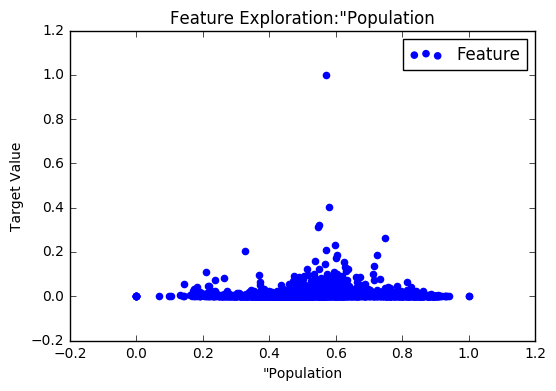

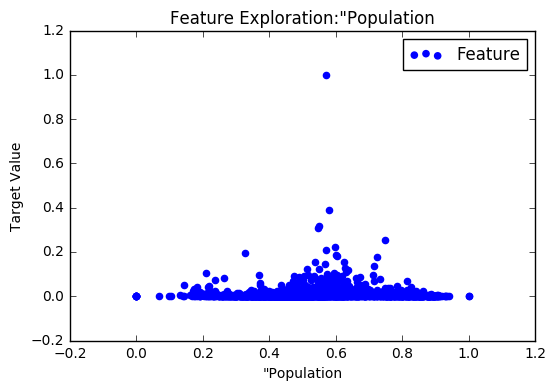

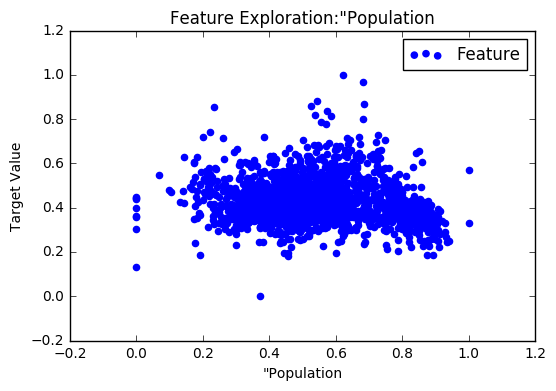

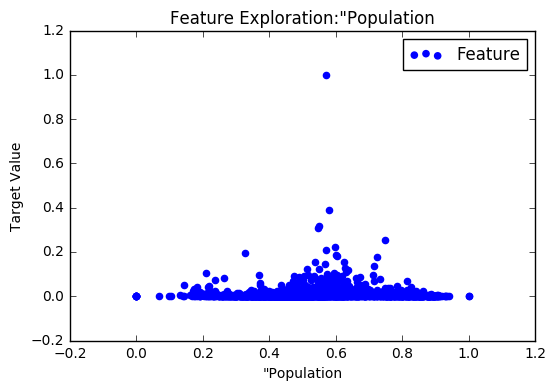

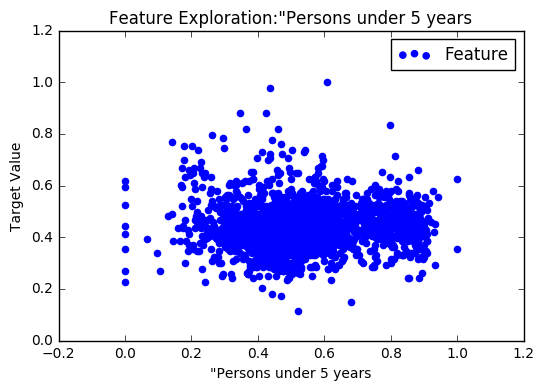

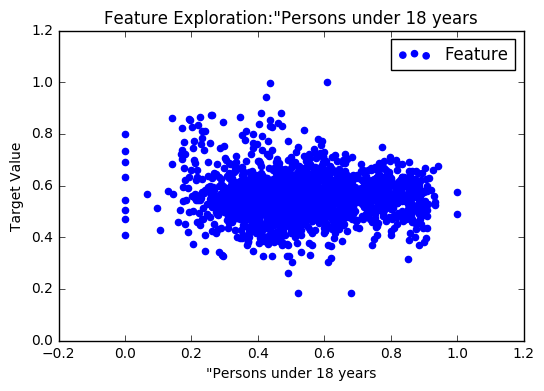

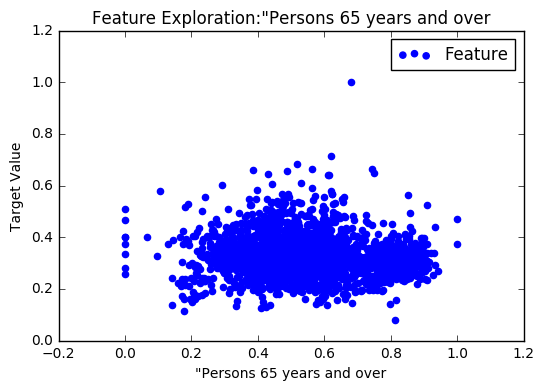

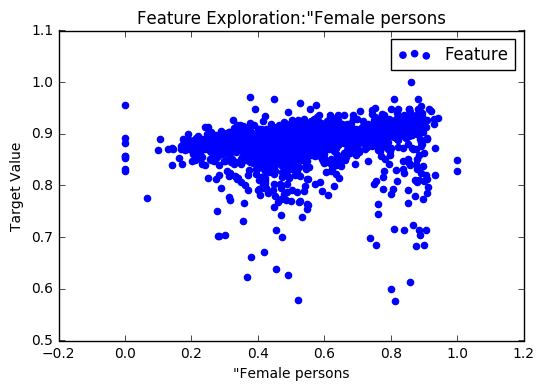

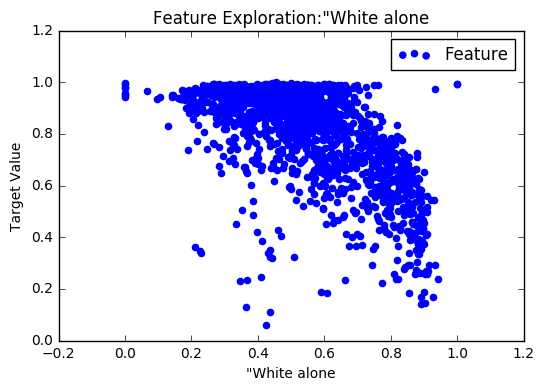

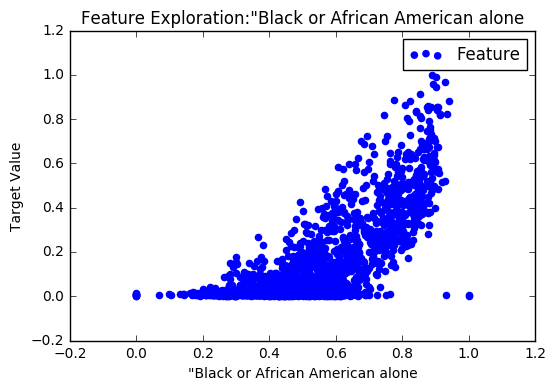

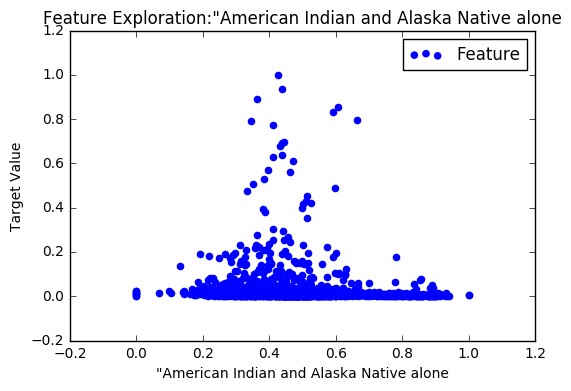

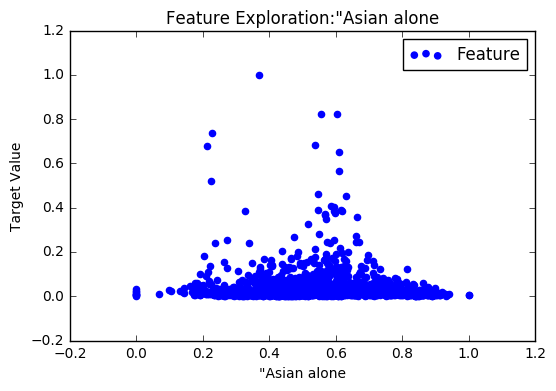

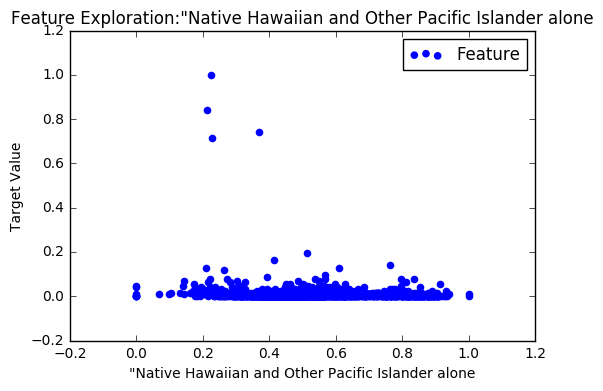

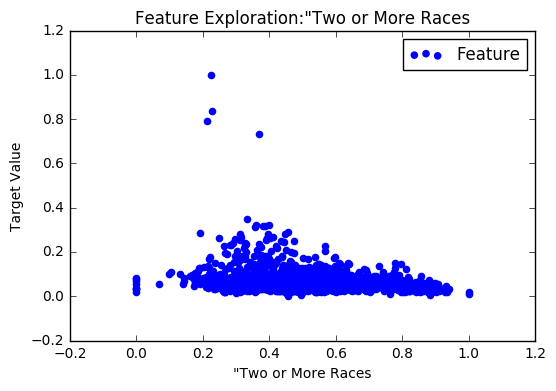

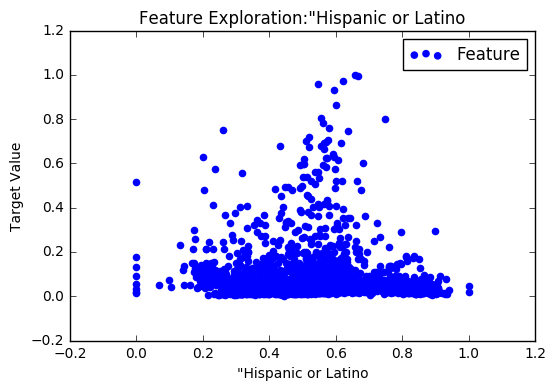

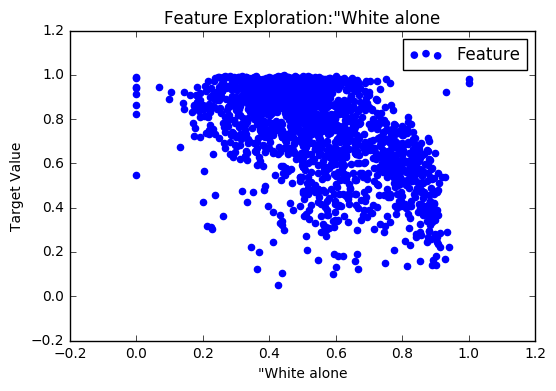

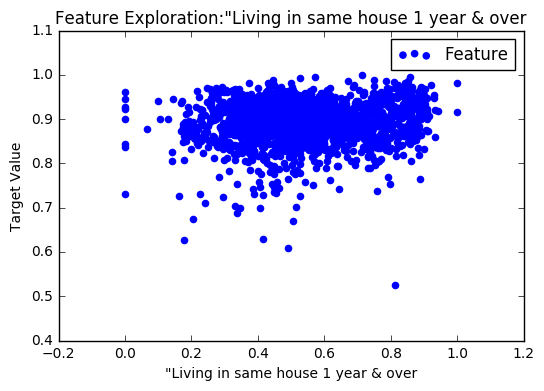

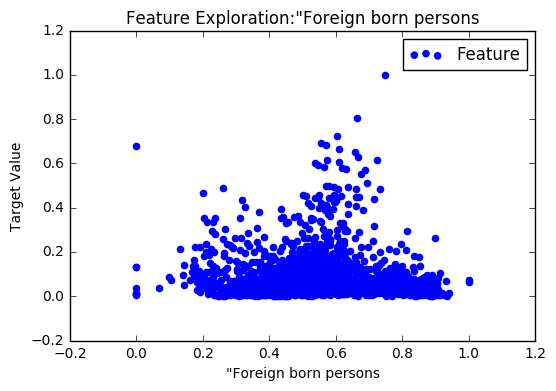

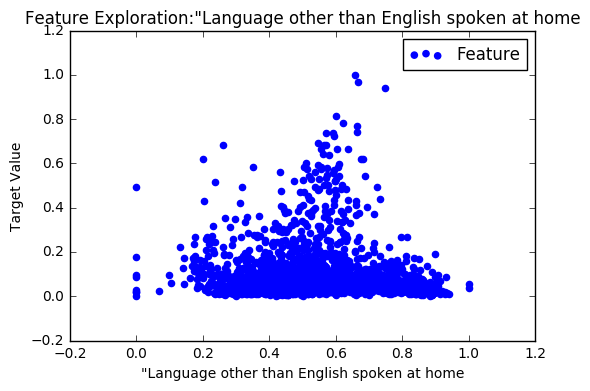

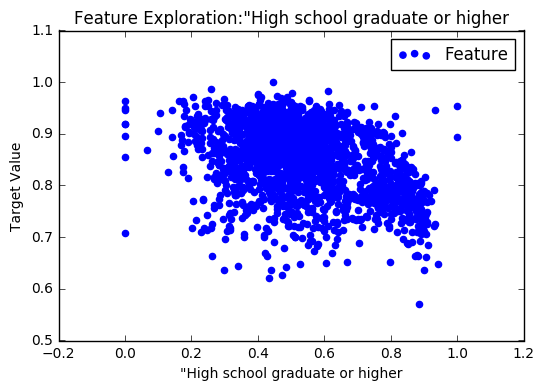

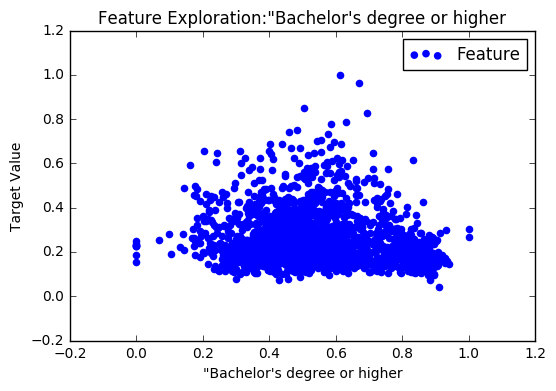

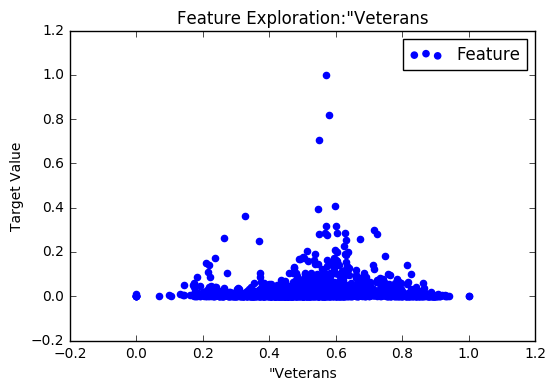

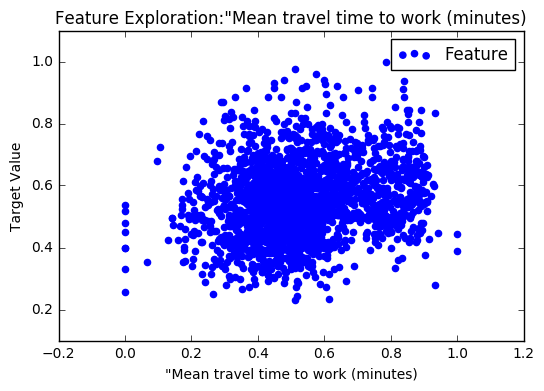

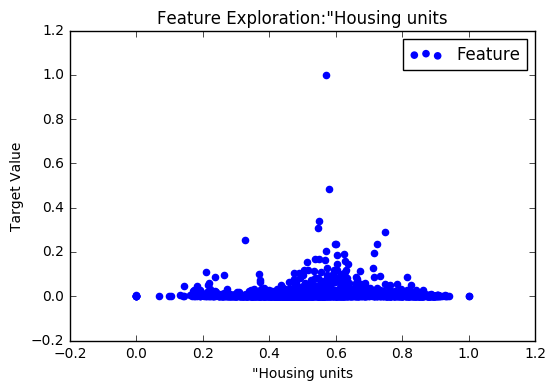

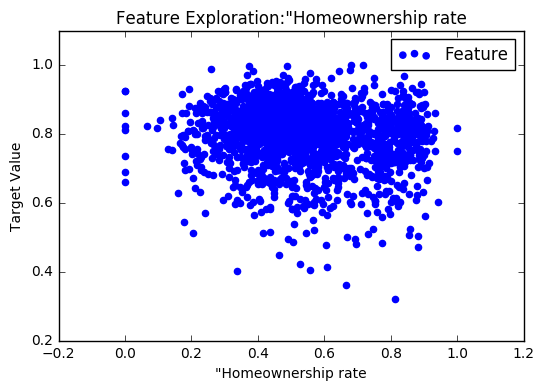

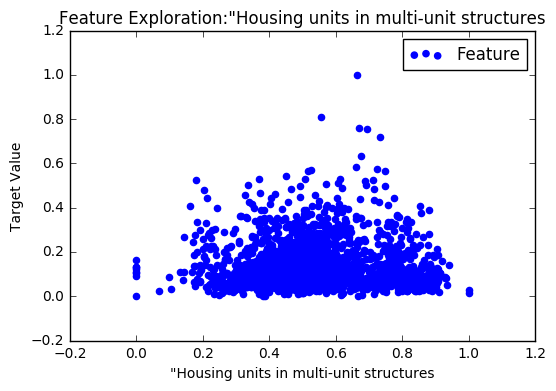

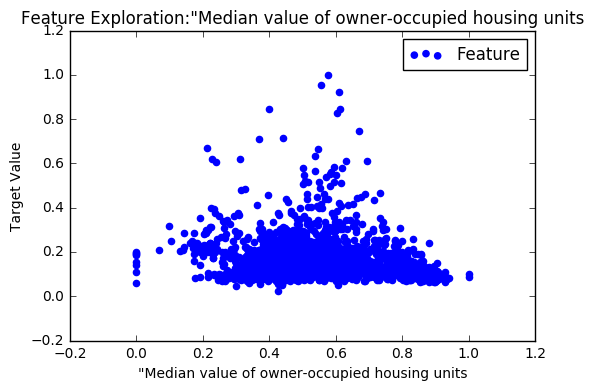

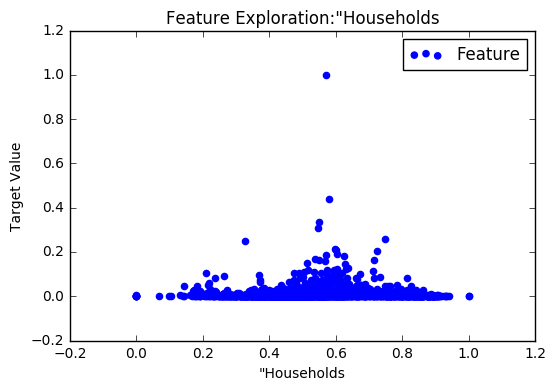

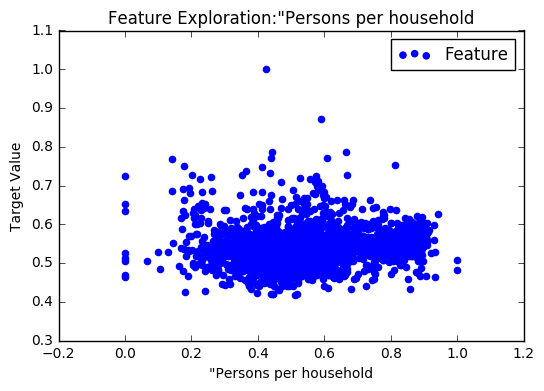

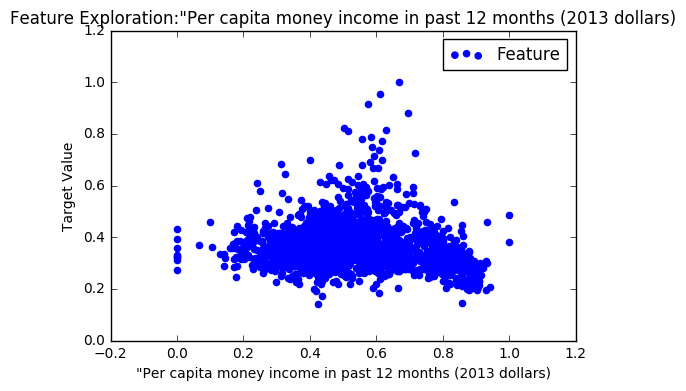

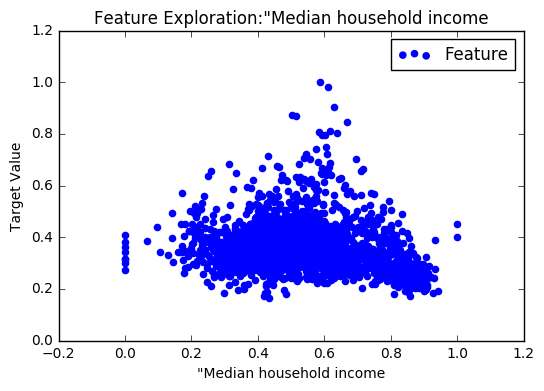

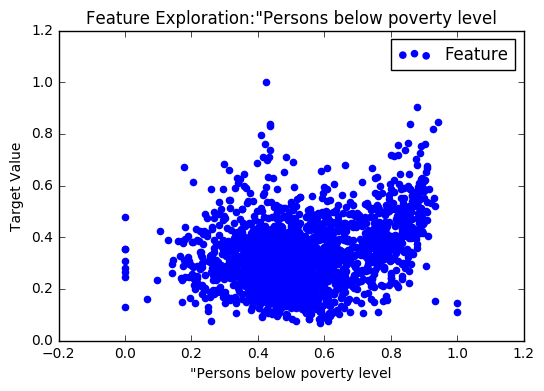

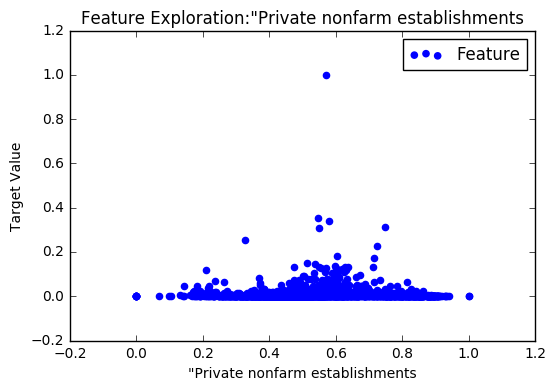

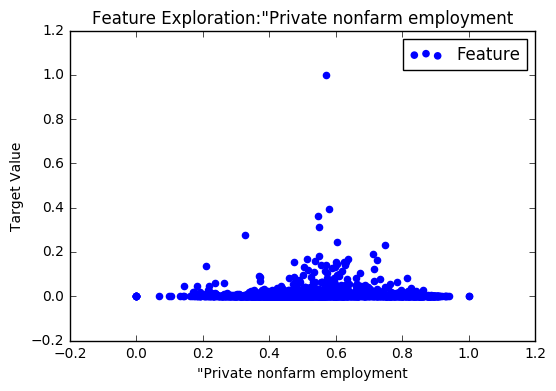

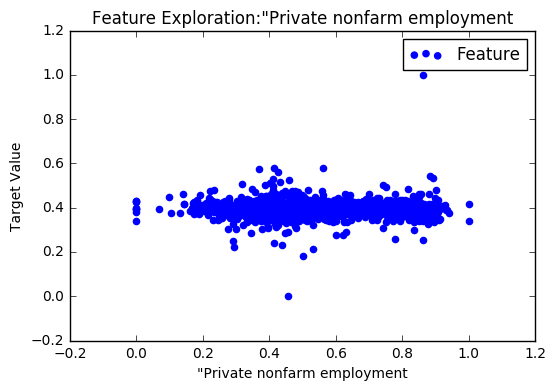

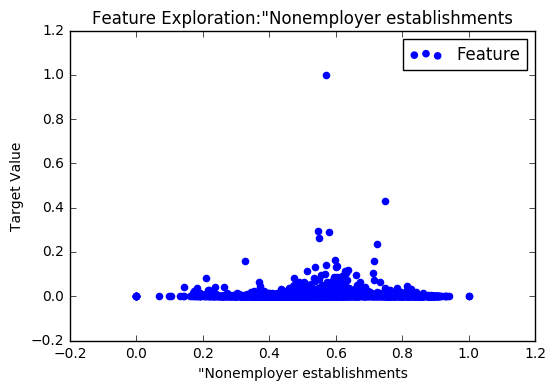

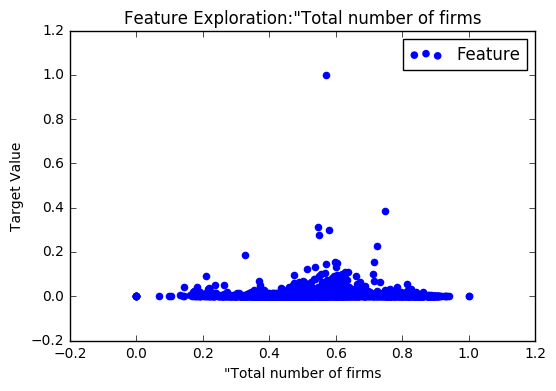

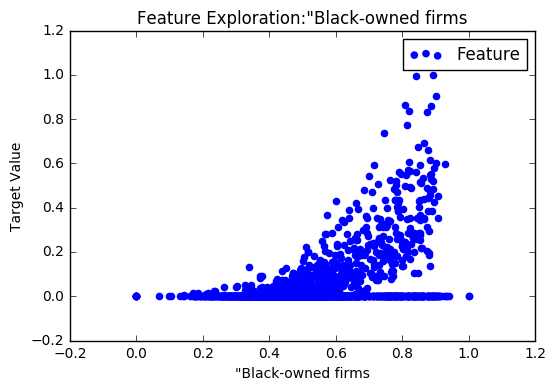

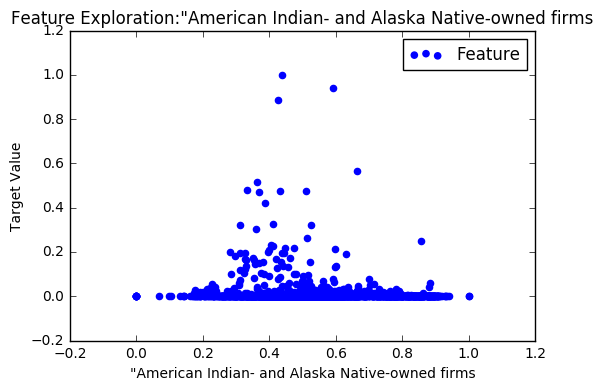

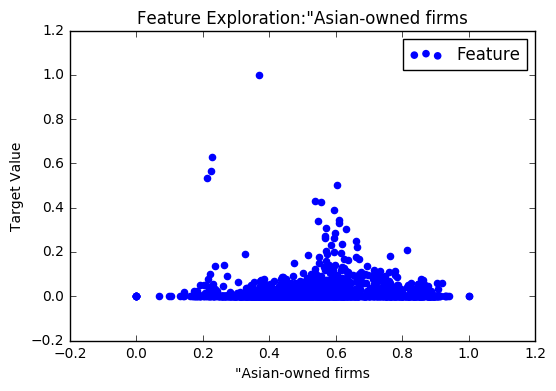

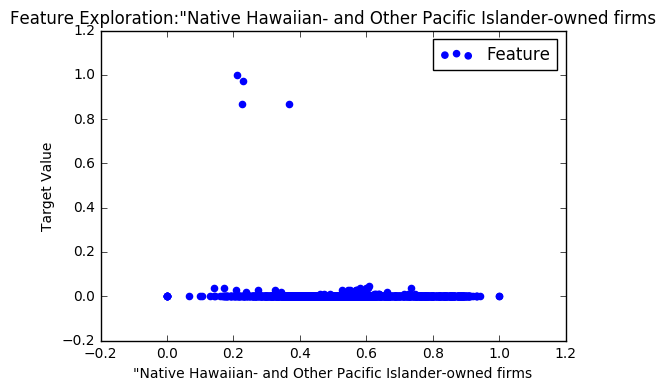

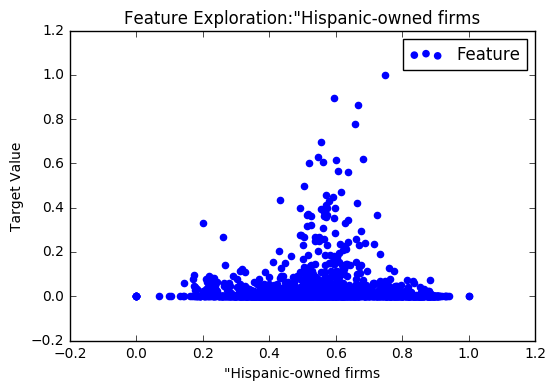

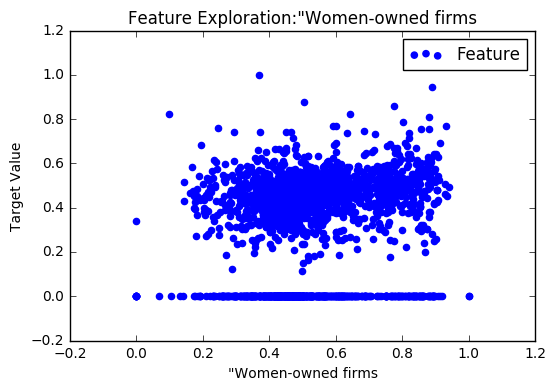

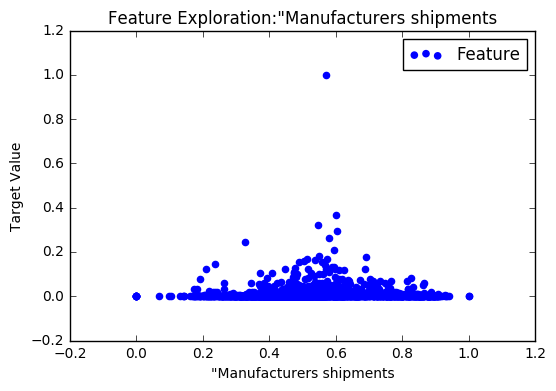

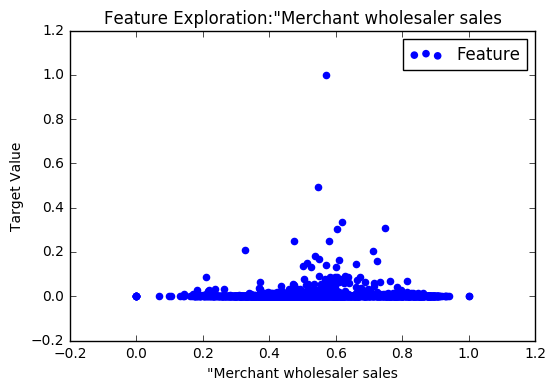

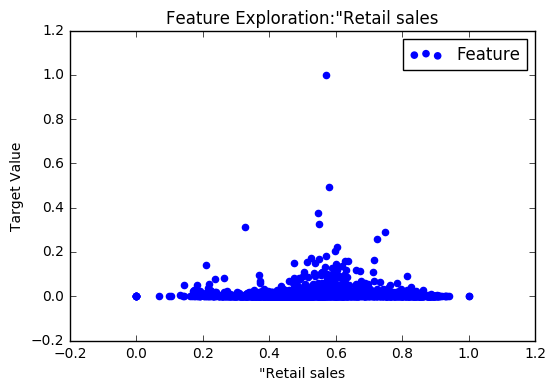

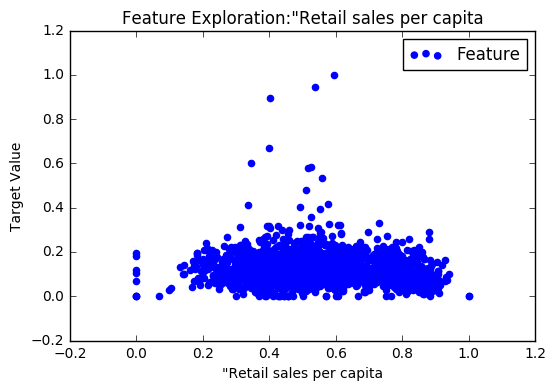

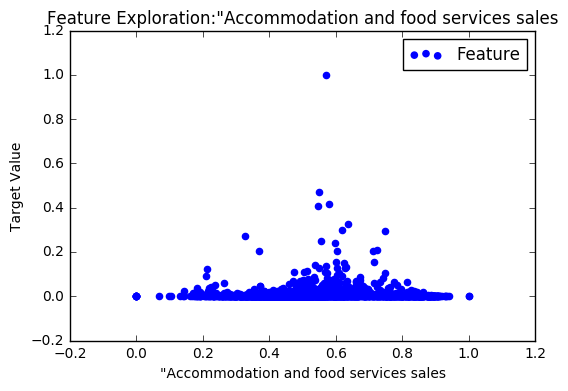

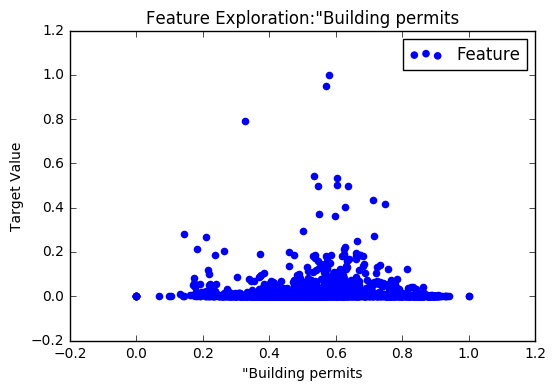

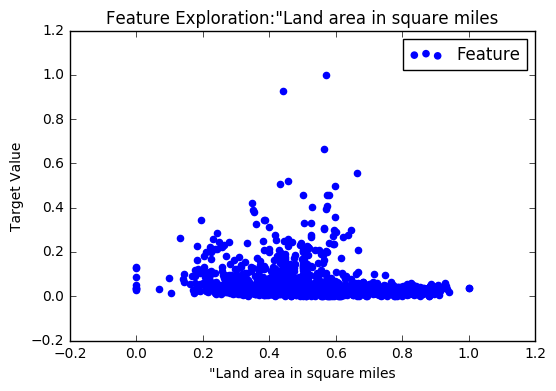

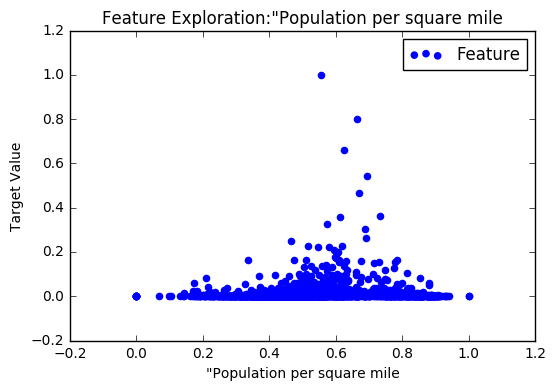

In [168]:
import matplotlib.pyplot as plt
for i in range(len(trainX[0])):
    plt.scatter(trainY,trainX[:,i], color='blue',label='Feature')
    plt.hold('on')
    plt.xlabel(paramdict[cols[i]])
    plt.ylabel('Target Value')
    plt.title('Feature Exploration:' + paramdict[cols[i]])
    plt.legend()
    plt.show()

As we can see by plotting 

# Basic Models:
Here we look at some off-the-shelf models including SVR with three different kernels (Gaussian, linear, and polynomial) and tune their parameters to increase performance using tools from sklearn such as gridsearch.

In [148]:
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
models = []
svr = svm.SVR()
# We will now look for the best parameters using grid search and random test/train splits of 
# 25-75 from our training data.
#parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[0.3, 1, 3, 10, 30, 100, 300, 1000, 3000, 10000], \
#              'epsilon':[0.003,0.01,0.03,0.1]}
parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[1,10], 'epsilon':[0.01,0.1], \
              'degree':[3,10], 'gamma':['auto', 0.01, 0.1]}
svr_model = GridSearchCV(svr, parameters)
svr_model.fit(trainX,trainY)

    

GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'epsilon': [0.01, 0.1], 'C': [1, 10], 'kernel': ('linear', 'rbf', 'poly'), 'degree': [3, 10], 'gamma': ['auto', 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [153]:
#svr_model.cv_results_
svr_model.best_score_
svr_model.best_params_
svr_model.best_estimator_

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.1,
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [154]:
# Logistic and Ridge regression models. 
regression = linear_model.LogisticRegression()
parameters = {}

# Ensembles
We can now build an ensemble using the k best scoring combinations of parameters and averaging them. One method of doing this would be to make a prediction using a voting system where each model gets votes proportional to their rank in the accuracy hierarchy.
Because having models that are 